In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Linear Regression
## Overview
    > For linear regression model, 4 different approches are listed below
    1. by matrix formula
    2. by Batch Gradient Descent
    3. by Stochastic Gradient Descent
    4. by Mini-batch Gradient Descent
## Formula
    > model formula
$$
    \hat Y = \theta^T \cdot X
$$
    
    > cost function - RMSE
$$
    MSE = \frac{1}{m}\sum_{i}^{m}{{(Y - \theta^T \cdot X)}^2}
$$

    > optimized result
$$
    \theta = {(X^TX)}^{-1}X^TY
$$

    > sklearn.linear_model could reach this by calling LinearRegression class
    > for sklearn, intercept_ is bias term, corresponding to all ones column
    > the rest parameters are stored in coef_, its number depends on features number in X

[2.95065095] [3.97343684]


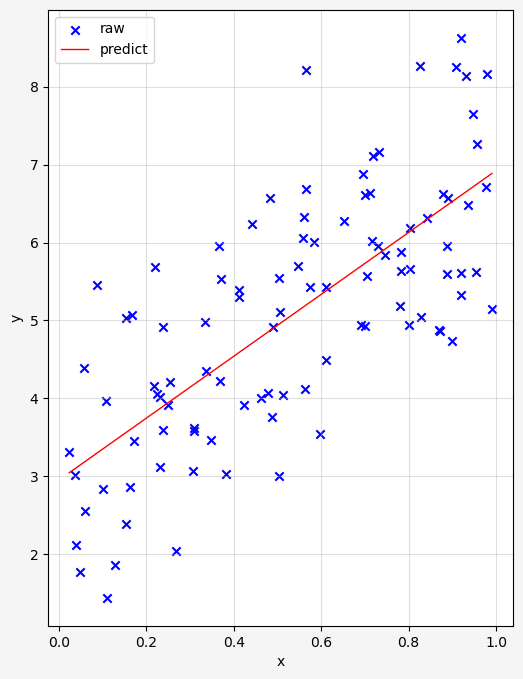

In [2]:
from sklearn.linear_model import LinearRegression

# generate linear data with random noises
X_raw = np.random.rand(100,1)
X = np.sort(X_raw,axis=0)
y = 3 + 4 * X + np.random.randn(100,1)

lin_reg = LinearRegression()
lin_reg.fit(X,y)
intercept = lin_reg.intercept_
slop = lin_reg.coef_

fig, ax = plt.subplots(1,1, figsize=(6,8),
                     facecolor='whitesmoke',
                     edgecolor='gray')
scatter = ax.scatter(X, y, marker="x", color='blue', label='raw')
linear = ax.plot(X, intercept+slop*X, lw=1, color='red', label='predict')
ax.legend(loc="upper left")
ax.grid(alpha=0.4)
ax.set_xlabel("x")
ax.set_ylabel("y")
print(intercept, slop[0])

## GD
    > BGD and SGD work under the same concept, which is updating parameter vector with gradient of cost function with respect to parameter vector
    > the difference lies in training data selection. BGD will take all data into calculation, which means that data matrix is of size (m*n), while SGD only takes one random data point for training, that is a single (1* n) vector, and for the purpose of preventing over-striding which would possibly leads to divergence, we introduce learning rate to fine-tune gradient for each sgd iteration. We always tends to gradually decreate learning rate with training progressing on. This process is also called simulated annealing.
    > Mini-batch GD is of the same manner, which slightly increases number of data points in each iteration. Make sure to distingush term iteration and epoch.
1. BGD is not supported in sklearn toolset, while we could find <font color=sapphire><b>SGDRegressor in sklearn.linear_model</b></font>


    > formula for gradient
$$
        \nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T\cdot(X\cdot\theta - y)
$$

    > formulat for paramter vector update
$$
        \theta^{(next \space step)} = \theta - \eta \cdot \nabla_{\theta} MSE(\theta)
$$

    > simulated annealing formula
$$
    \eta = \frac{t_0}{f(epoch)+ t_1}
$$

In [3]:
import numpy as np

# total training epoch, hyperparameter
n_epoch = 400
# number of data points, or whole batch size
m = 100
# simulated annealing parameter, hyperparameter
t0, t1 = 5, 50
# initialization of parameter vedtor \theta
theta = np.random.randn(2,1)
# adding all zero power term(interception) to training dataset
X_b = np.c_[np.ones((100,1)),X.reshape(100,1)]
# store MSE
mse_list = []
# store theta
theta_list = []

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epoch):
    for i in range(m):
        theta_list.append(theta)
        random_index = np.random.randint(m)
        xi = X_b[random_index,:]
        yi = y[random_index,:]
        grad = 2*xi.reshape(2,1).dot(xi.reshape(1,2).dot(theta)-yi)
        mse = pow(xi.reshape(1,2).dot(theta) - yi, 2)
        mse_list.append(mse)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * grad
    if epoch % 40 == 0:
        print("epoch %s: "% epoch)
        print(theta)
        print("============================")

epoch 0: 
[[3.48066902]
 [2.99980566]]
epoch 40: 
[[3.03284885]
 [3.79988505]]
epoch 80: 
[[3.03433775]
 [3.84889629]]
epoch 120: 
[[2.98781888]
 [3.84842256]]
epoch 160: 
[[3.03626446]
 [3.904919  ]]
epoch 200: 
[[2.9725495 ]
 [3.89440025]]
epoch 240: 
[[2.98414388]
 [3.91225125]]
epoch 280: 
[[2.9684514 ]
 [3.89940945]]
epoch 320: 
[[2.97917911]
 [3.90897026]]
epoch 360: 
[[2.9776023 ]
 [3.91629579]]


In [4]:
theta

array([[2.99128402],
       [3.92453162]])

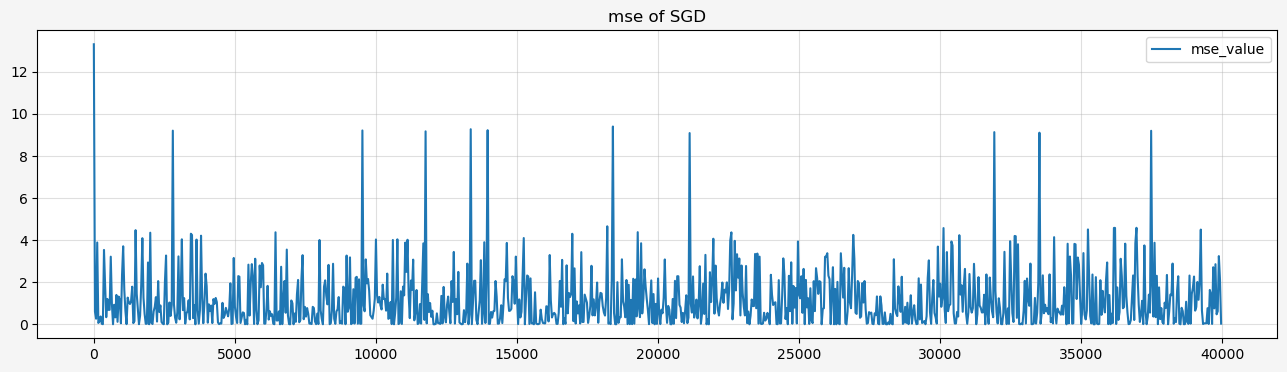

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,facecolor="whitesmoke",
                      edgecolor='gray',figsize=(16,4))
ax.plot(np.asarray(list(range(len(mse_list))))[::40], np.asarray(mse_list).flatten()[::40],label="mse_value")
ax.set_title("mse of SGD")
ax.legend(loc="upper right")
ax.grid(alpha=0.4)

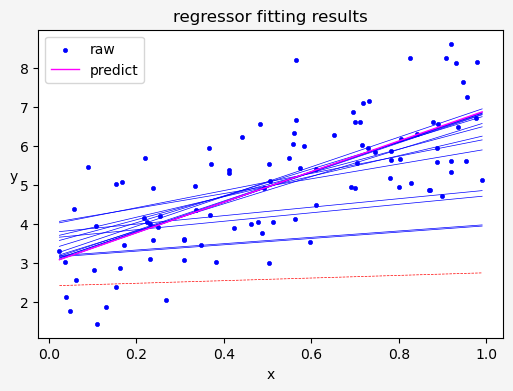

In [6]:
fig, ax = plt.subplots(1,1,facecolor="whitesmoke",
                      edgecolor='gray',figsize=(6,4))
ax.scatter(X, y, marker=".", color="blue", lw=0.5, label="raw")
iter_op = 1
for index, (intercept, slope) in enumerate(theta_list):
    if index == 0:
        ax.plot(X, slope*X+intercept, lw=0.5,ls="--",color="red")
    if index % iter_op == 0 and index != 0:
        ax.plot(X, slope*X+intercept, lw=0.5,ls="-",color="blue")
        iter_op *= 2
ax.plot(X, theta[1]*X+theta[0], lw=1,ls="-",color="magenta", label="predict")
ax.legend(loc="upper left")
ax.set_title("regressor fitting results")
ax.set_xlabel("x")
ax.set_ylabel("y",rotation=0)
plt.show()

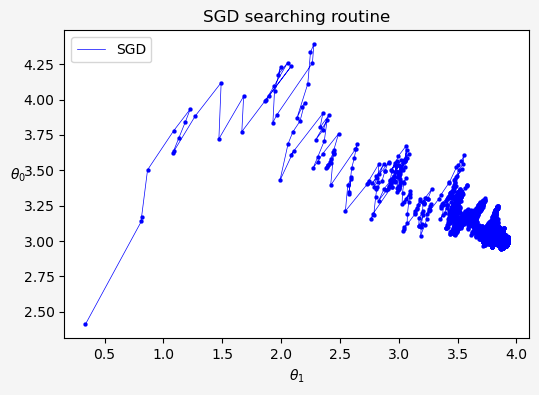

In [7]:
fig, ax = plt.subplots(1,1,facecolor="whitesmoke",
                      edgecolor='gray',figsize=(6,4))
theta_pts = np.asarray(theta_list).flatten().reshape(len(theta_list),2)
ax.plot(theta_pts[:,1],theta_pts[:,0], lw=0.5, color="blue",label="SGD")
ax.scatter(theta_pts[:,1],theta_pts[:,0], marker='.', lw=0.1, color='blue')
ax.legend(loc="upper left")
ax.set_title("SGD searching routine")
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_0$', rotation=0)
plt.show()

# Polynomial Regression
1. adding higher power terms by manipulating exsting data
2. <font color=burgendy><b>sklearn.preprocessing PolynomialFeatures</b></font> could do, or simply numpy columnar manipulation would do

(100, 30)


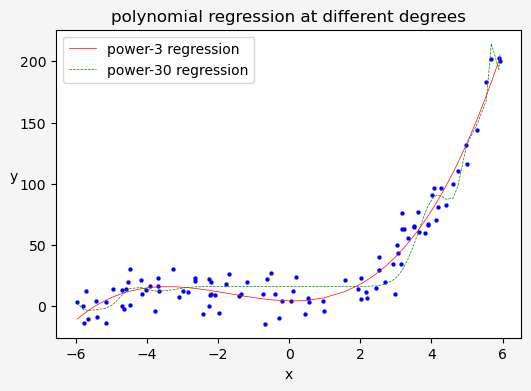

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# prepare input noise-added data
m = 100
X = np.sort(12*np.random.rand(m,1)-6, axis=0)
y = 0.5 * X**3 + 2.7 * X**2 + 3 + 12 * np.random.randn(m,1)

poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_features_30 = PolynomialFeatures(degree=30, include_bias=False)
X_poly_3 = poly_features_3.fit_transform(X)
X_poly_30 = poly_features_30.fit_transform(X)
print(X_poly_30.shape)

lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_3,y)
lin_reg_30 = LinearRegression()
lin_reg_30.fit(X_poly_30,y)

y_3 = lin_reg_3.intercept_ * np.ones_like(X) + X_poly_3.dot(lin_reg_3.coef_.T)
y_30 = lin_reg_30.intercept_ * np.ones_like(X) + X_poly_30.dot(lin_reg_30.coef_.T)

fig, ax = plt.subplots(1,1,facecolor="whitesmoke",
                      edgecolor='gray',figsize=(6,4))
ax.scatter(X, y, marker='.', color="b", lw=0.1)
ax.plot(X, y_3, lw=0.5, ls="-", color="red", label="power-3 regression")
ax.plot(X, y_30, lw=0.5, ls="--", color="green", label="power-30 regression")
ax.legend(loc='upper left')
ax.set_title("polynomial regression at different degrees")
ax.set_xlabel("x")
ax.set_ylabel("y", rotation=0)
plt.show()

In [9]:
print(lin_reg_3.intercept_, lin_reg_3.coef_)

[4.52237757] [[-0.56619705  2.62603652  0.52696497]]


# learning curve
1. one efficient way to decide wether a model is over fitting or underfitting.
2. main trick is increase volume of training set and testing set gradually and compare their cost function value, in regression case, this is MSE or RMSE

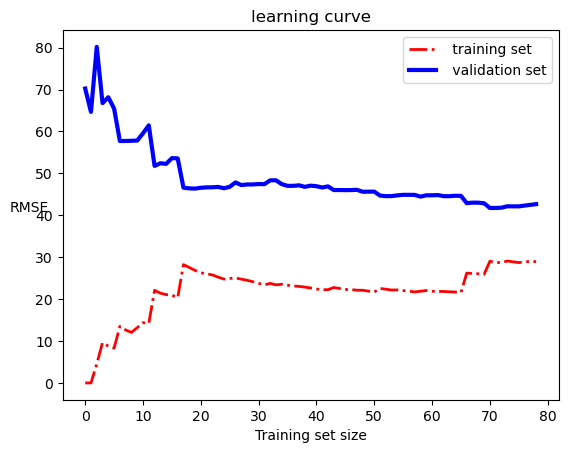

In [10]:
# let's take cubic function above
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    # list store mse of training and testing
    train_errors, test_errors = [], []
    # increase volume of training set gradually
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m],y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))
    plt.plot(np.sqrt(train_errors),lw=2,ls='-.', color='red', label=" training set")
    plt.plot(np.sqrt(test_errors),lw=3,ls='-', color='blue', label=" validation set")
    plt.legend(loc="upper right")
    plt.title("learning curve")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE", rotation=0)

# this case we'll show underfitting
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

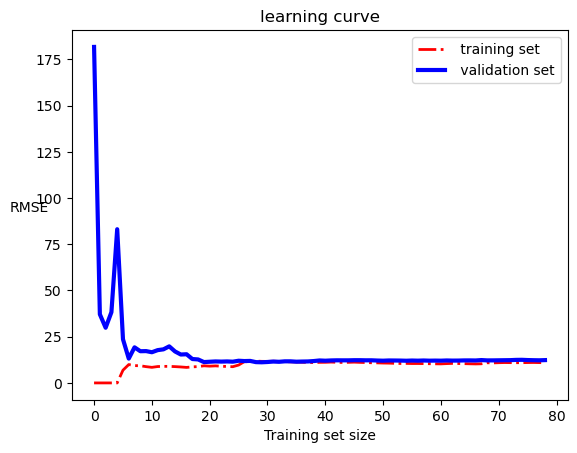

In [11]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
    ("sgd_red", LinearRegression())
    ])
plot_learning_curves(polynomial_regression, X, y)

# Regularization
1. basic concept is adding terms with regards to parameter vector on training cost function to constrain paramters
2. usually cost function in training set is different from that in test set.
3. lasso and elastic net tends to discard features that contribute less to label or target
## Ridge Regression
$$
    J(\theta) = MSE(\theta) + \alpha \frac{1}{2}\sum_{i=1}^{n}{{\theta_{i}}^2}
$$

    > closed-form formula

$$
    \hat \theta = {(X^T \cdot X + \alpha I)}^{-1} + X^T \cdot y
$$
* where $I$ is one $(n*n)$ identity matrix

> linear_model Ridge or linear_model SGDRegressor(penalty='l2')

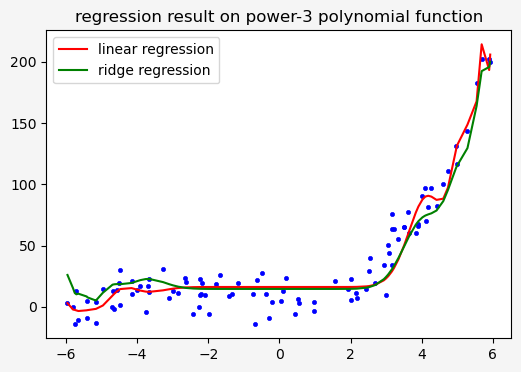

In [12]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_poly_30, y)
y_pred_ridge = ridge_reg.predict(X_poly_30)

fig, ax = plt.subplots(1,1, figsize=(6,4),
                      facecolor='whitesmoke',
                      edgecolor='gray')
ax.scatter(X,y, marker='.', color='b',lw=0.5)
ax.plot(X,y_30, '-r', label="linear regression")
ax.plot(X,y_pred_ridge, '-g', label="ridge regression")
ax.legend(loc="upper left")
ax.set_title("regression result on power-3 polynomial function")
plt.show()

## Lasso
$$
    J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n}{|\theta_{i}|}
$$

while this time subgradient formula is like:
$$
    g(\theta,J) = \nabla_{\theta} MSE + \alpha \cdot sign(\theta)
$$

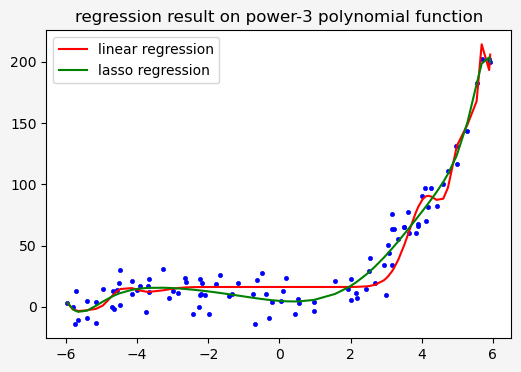

In [13]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
import warnings 

warnings.filterwarnings("ignore")

lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_poly_30, y)
y_pred_lasso = lasso_reg.predict(X_poly_30)

fig, ax = plt.subplots(1,1, figsize=(6,4),
                      facecolor='whitesmoke',
                      edgecolor='gray')
ax.scatter(X,y, marker='.', color='b',lw=.5)
ax.plot(X,y_30, '-r', label="linear regression")
ax.plot(X,y_pred_lasso, '-g', label="lasso regression")
ax.legend(loc="upper left")
ax.set_title("regression result on power-3 polynomial function")
plt.show()

## Elastic Net
$$
    J(\theta) = MSE + r\alpha \sum_{i=1}^{n}{|\theta_i|} + \frac{1-r}{2}\alpha\sum_{i=1}^{n}{{\theta_i}^2}
$$

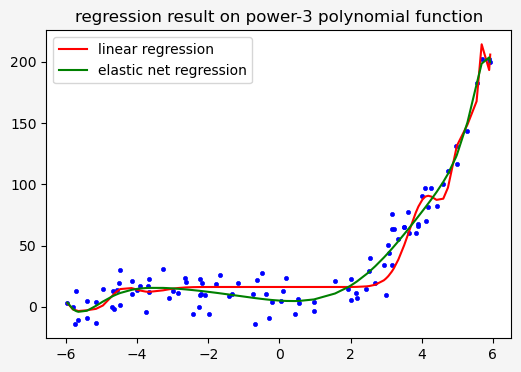

In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures

# l1_ratio here is equal to r in formula
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X_poly_30, y)
y_pred_elanet = elastic_net.predict(X_poly_30)

fig, ax = plt.subplots(1,1, figsize=(6,4),
                      facecolor='whitesmoke',
                      edgecolor='gray')
ax.scatter(X,y, marker='.', color='b',lw=.5)
ax.plot(X,y_30, '-r', label="linear regression")
ax.plot(X,y_pred_elanet, '-g', label="elastic net regression")
ax.legend(loc="upper left")
ax.set_title("regression result on power-3 polynomial function")
plt.show()

## early stopping
stop training when rmse(cost function) reaches its minimum, which means we might reach global minimum

<font color=purple><b>SGDRegressor parameters overview</b></font>

    > loss='squared_error',
    > penalty='l2',
    > alpha=0.0001,
    > l1_ratio=0.15,
    > fit_intercept=True,
    > max_iter=1000,
    > tol=0.001,
    > shuffle=True,
    > verbose=0,
    > epsilon=0.1,
    > random_state=None,
    > learning_rate='invscaling',
    > eta0=0.01,
    > power_t=0.25,
    > early_stopping=False,
    > validation_fraction=0.1,
    > n_iter_no_change=5,
    > warm_start=False,
    > average=False,

13039
[35.14992894] [ -2.92631781  24.8691139   47.15111303  11.38240364   1.75001538
 -10.63858871 -11.60628243 -12.63445131  -7.53152717  -5.9873081
   0.10995271   1.55624847   5.97995672   7.07524291   8.92784955
   9.93820586   9.26545079  10.36389661   7.64523944   8.81862955
   4.68291693   5.79026561   0.86445305   1.71171126  -3.45264913
  -3.0586188   -8.01399706  -8.23526585 -12.64193773 -13.59703184]


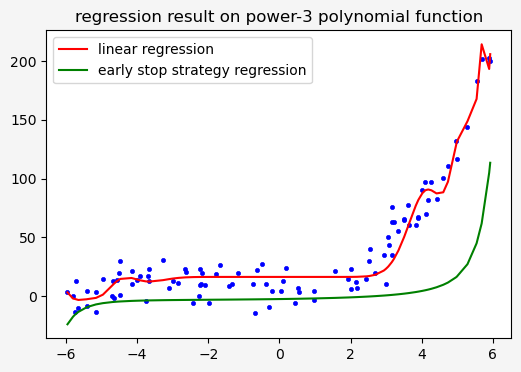

In [50]:
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# for higher-power regression model, standardization is necessary
std_scaler = StandardScaler()
X_scaled_30 = std_scaler.fit_transform(X_poly_30)
single_sgd_reg = SGDRegressor(max_iter=1, warm_start=True,  penalty=None,
                              learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
cnt = 0
for epoch in range(20000):
    single_sgd_reg.fit(X_scaled_30,y)
    y_single_sgd_pred = single_sgd_reg.predict(X_scaled_30)
    single_error = mean_squared_error(y_single_sgd_pred, y)
    if single_error < minimum_val_error:
        minimum_val_error = single_error
        best_epoch = epoch
        best_model = clone(single_sgd_reg)
        cnt = 0
    else:
        cnt += 1
    # if mse doesn't increase in 20 consecutive epoch, 
    # assert convergence and leave iteration
    if cnt >= 20:       
        break

print(best_epoch)
print(single_sgd_reg.intercept_, single_sgd_reg.coef_)

best_model.fit(X_scaled_30, y)
y_single_pred = best_model.predict(X_scaled_30)
fig, ax = plt.subplots(1,1, figsize=(6,4),
                      facecolor='whitesmoke',
                      edgecolor='gray')
ax.scatter(X,y, marker='.', color='b',lw=.5)
ax.plot(X,y_30, '-r', label="linear regression")
ax.plot(X,y_single_pred, '-g', label="early stop strategy regression")
ax.legend(loc="upper left")
ax.set_title("regression result on power-3 polynomial function")
plt.show()

# Logistic Regression
1. commonly used to estimate the probability that an instance belongs to a particular class, all outputs of model will be processed through one continuously differentiable function.
$$
    \sigma(t) = \frac{1}{1 + e^{-t}}
$$
2. output of model will be precessed by
$$
    \hat p = h_{\theta}(x) = \sigma(\theta^T \cdot \vec x)
$$
3. for a sigmoid function, the threshold is always set as 0.5, this is used in one binary classifier
4. cost function of logistic regression
$$
\left\{
\begin{array}{ll}
    J(\theta) & = & \frac{1}{m}L(\theta) \\
    L(\theta) & = & \sum_{i=1}^{m}{y_{i}logp(x_i)} + \sum_{i=1}^{m}{(1-y_{i})log(1-p(x_i))} \\
    p(x_i) & = & \sigma(\theta^{T}x_{i}) \\
\end{array}
\right .
$$
5. derivitive form of cost function
$$
    \frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}[\sigma(\theta^{T}x) - y]x_j
$$
6. note that x here is a $(m,n)$ matrix where m stands for m features and n stands for n data points(entries)

## sigmoid function
1. transfer $\theta^T \cdot x \in R$ to $\hat y \in (0, 1)$ set
2. also, sigmoid is a cdf function

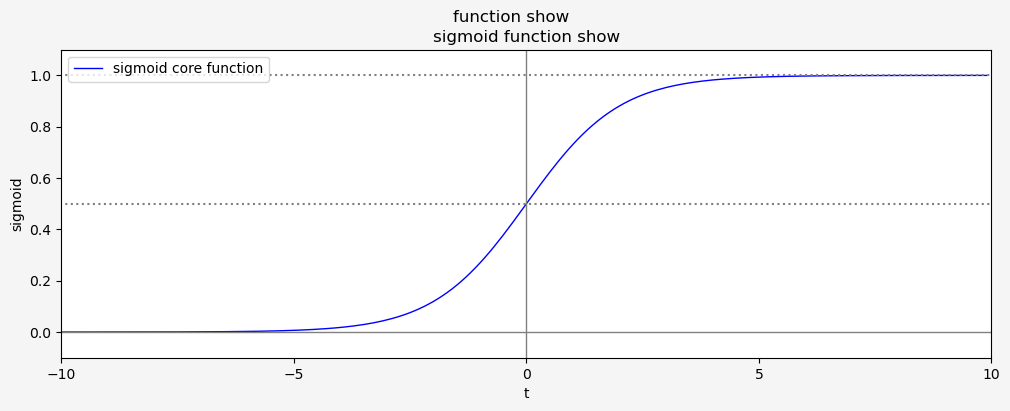

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

sigma_x = np.arange(-10,10,0.1)
sigma_y = 1 /(1 + np.power(np.e, -sigma_x))
fig, ax = plt.subplots(1,1,figsize=(12,4),facecolor='whitesmoke', edgecolor='gray')
ax.plot(sigma_x, sigma_y, lw=1, ls= '-', color='blue',label="sigmoid core function")
fig.suptitle("function show")
ax.legend(loc="upper left")
ax.set_xlabel("t")
ax.set_ylabel("sigmoid")
ax.set_xticks(np.arange(-10,10.1,5))
ax.set_yticks(np.arange(0,1.2,0.2))
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,1.1)
ax.set_title('sigmoid function show')
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
ax.hlines(0.5,-12,12, ls=':', color='gray')
ax.hlines(1.0,-12,12, ls=':', color='gray')
plt.show()

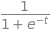

In [59]:
from sympy import *

init_printing(use_unicode=True)

t = symbols("t")
ft = 1/(1 + exp(-t))
ft

## attribute of sigmoid function
1. derivitives
$$
    \sigma^{\prime}(x) = \sigma(x) \cdot (1-\sigma(x))
$$

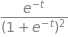

In [60]:
df_ft = diff(ft, t)
df_ft

## decision boundary
1. take place where $\sigma(\theta \cdot x) = 0.5$ . This time entries has equal probabiliy to be classified in either class
2. for linear model in sklearn <font color=maroon><b>(LogisticRegression)</b></font>, <font color=maroon><b>predict()</b></font> will output its final class while <font color=maroon><b>predict_proba()</b></font> will output its original decision value, a number between 0 and 1

In [65]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

raw_iris = load_iris()
print(raw_iris.keys())
print(raw_iris["feature_names"])
print(raw_iris["target_names"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [67]:
# select oetal length feature
X_iris = raw_iris.data[:,3].reshape(-1,1)
# select virginica as target, make a binary classifier
y_iris = (raw_iris["target"] == 2).astype(np.int64)
# initiate classifier
logis_reg = LogisticRegression()
logis_reg.fit(X_iris, y_iris)

LogisticRegression()

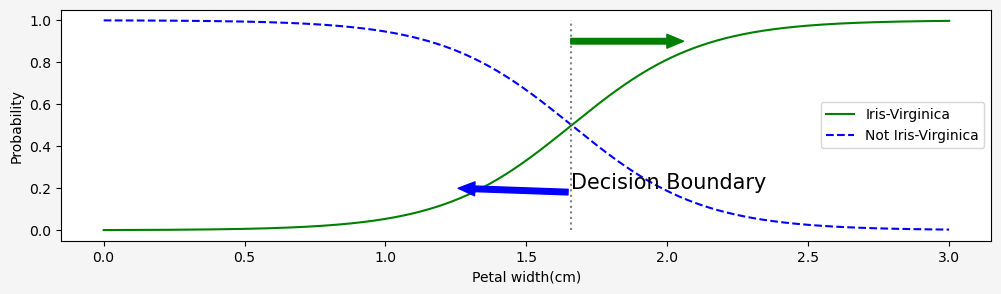

In [93]:
X_range = np.linspace(0,3,1000).reshape(-1,1)
y_proba = logis_reg.predict_proba(X_range)

mid = None
for i in range(len(X_range)):
    if y_proba[i,1] - y_proba[i,0] <= 0.000001:
        mid = X_range[i,0]

%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(12,3),
                       facecolor='whitesmoke',
                       edgecolor='gray')
ax.plot(X_range, y_proba[:,1],'g-',label="Iris-Virginica")
ax.plot(X_range, y_proba[:,0],'b--',label="Not Iris-Virginica")
ax.vlines(mid, 0, 1,lw=1.5, ls=':', color='gray')
ax.annotate(text="Decision Boundary", xytext=(mid,0.2), xy=(mid-0.4,0.2),
            arrowprops = {'headwidth':10,'facecolor':'b','edgecolor':'b'},fontsize = 15)
ax.annotate(text="", xytext=(mid,0.9), xy=(mid+0.4,0.9),
            arrowprops = {'headwidth':10,'facecolor':'g','edgecolor':'g'},fontsize = 15)
ax.set_xlabel("Petal width(cm)")
ax.set_ylabel("Probability")
ax.legend(loc="best")
plt.show()

# Softmax Regression
1. also called Multinomial Logistic Regression
2. ova combinations
3. combination function - normalized exponential
$$
\left\{
\begin{array}{ll}
    s_{k}(x) & = & \theta^{T} \cdot x \\
    \hat p_{k} & = & {\sigma[s(x)]}_k = \frac{exp[s_{k}(x)]}{\sum_{j=1}^{K}{exp[s_{j}(x)]}}
\end{array}
\right .
$$
4. here $\theta$ is a $(k,m)$ matrix, k means k-classes and m means m features, $x$ is still a $(m,n)$ data matrix with each column symbolizes one data entry, final output $s_{k}(x)$ is a $(k,n)$ matrix
5. for training, all target should be processed into one-hot form, then 
6. cost function (similar to logistic regression, instead of binomial distribution, it's a multinomial distribution)
$$
    J(\theta) = -\frac{1}{m}\sum_{k=1}^{K}{y_k \cdot log(\hat p_{k})}
$$
7. derivitive form of cost function
$$
    \frac{\partial J(\theta)}{\partial \theta_{k}} = \frac{1}{m}[\hat p_{k} - y_{k}]\cdot x
$$

In [98]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# select 2 different features: petal length, petal width
X_sft = raw_iris["data"][:,(2,3)]
# 3 classes, and will be transferred into one-hot form
y_sft = raw_iris["target"]

softmax_reg = LogisticRegression(multi_class='multinomial',solver="lbfgs", C=10)
softmax_reg.fit(X_sft,y_sft)

LogisticRegression(C=10, multi_class='multinomial')

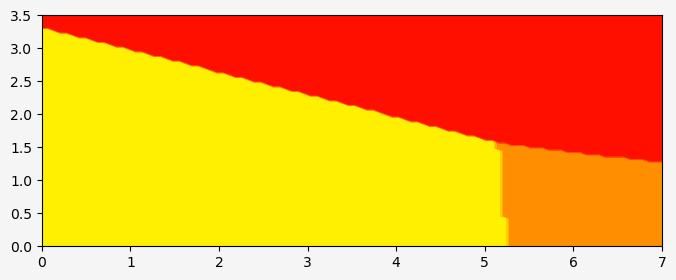

In [111]:
xx_sft = np.linspace(0,7,100)
yy_sft = np.linspace(0,3.5,100)

xx, yy = np.meshgrid(xx_sft, yy_sft)
zz = np.zeros_like(xx)
for x_idx in range(len(xx_sft)):
    for y_idx in range(len(yy_sft)):
        zz[x_idx, y_idx] = softmax_reg.predict([[ yy_sft[y_idx],xx_sft[x_idx]]])

fig,ax = plt.subplots(1,1,facecolor='whitesmoke',edgecolor='grey',
              figsize=(8,3))
#ax.scatter()
ax.contourf(xx,yy,zz,cmap=plt.cm.autumn_r)

## Hardmax realisztion



In [ ]:
import tensorflow as tf

print(tf.__version__)